In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mehradaria/leukemia")

print("Path to dataset files:", path)


100%|██████████| 110M/110M [00:01<00:00, 78.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import tensorflow as tf
import keras
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical


In [ ]:
code = {
    'Benign': 0,
    'Early': 1,  # Added 'Early' class
    'Pre': 2,    # Add more classes if needed
    'Pro': 3
}

def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

In [ ]:
s=224
import cv2
from tqdm import tqdm
import os

In [ ]:

dataset_path = "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Original/Benign"

X_train = []
y_train = []
code = {'Benign': 0}  # Ensure 'code' dictionary is defined properly

for img in tqdm(os.listdir(dataset_path)):
    image = cv2.imread(os.path.join(dataset_path, img), 1)
    image_array = cv2.resize(image, (s, s))
    X_train.append(image_array)  # No need to convert to list explicitly
    y_train.append(code['Benign'])

100%|██████████| 504/504 [00:00<00:00, 854.24it/s]


In [ ]:
# Define class encoding dictionary properly
code = {
    'Benign': 0,
    'Early': 1,  # ✅ Ensure 'Early' is included
    'Pre': 2,
    'Pro': 3
}

early_dataset_path = "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Original/Early"

for img in tqdm(os.listdir(early_dataset_path)):
    image = cv2.imread(os.path.join(early_dataset_path, img), 1)

    if image is not None:  # ✅ Ensure the image is loaded properly
        image_array = cv2.resize(image, (s, s))
        X_train.append(image_array)
        y_train.append(code['Early'])  # ✅ Now it will not throw a KeyError
    else:
        print(f"Warning: Could not read image {img}")


early_dataset_path = "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Original/Early"

for img in tqdm(os.listdir(early_dataset_path)):
    image = cv2.imread(os.path.join(early_dataset_path, img), 1)

    if image is not None:  # ✅ Ensure the image is loaded properly
        image_array = cv2.resize(image, (s, s))
        X_train.append(image_array)
        y_train.append(code['Early'])  # ✅ Now it will not throw a KeyError
    else:
        print(f"Warning: Could not read image {img}")


100%|██████████| 985/985 [00:00<00:00, 1338.00it/s]


In [ ]:
# Define dataset path for 'Pre' class
pre_dataset_path = "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Original/Pre"

for img in tqdm(os.listdir(pre_dataset_path)):
    image = cv2.imread(os.path.join(pre_dataset_path, img), 1)
    image_array = cv2.resize(image, (s, s))
    X_train.append(image_array)  # No need to convert to list explicitly
    y_train.append(code['Pre'])  # Ensure 'Pre' is in the code dictionary


100%|██████████| 963/963 [00:00<00:00, 1225.45it/s]


In [ ]:
# Define dataset path for 'Pro' class
pro_dataset_path = "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Original/Pro"

for img in tqdm(os.listdir(pro_dataset_path)):
    image = cv2.imread(os.path.join(pro_dataset_path, img), 1)
    image_array = cv2.resize(image, (s, s))
    X_train.append(image_array)  # No need to convert to list explicitly
    y_train.append(code['Pro'])  # Ensure 'Pro' is in the code dictionary


100%|██████████| 804/804 [00:00<00:00, 1365.11it/s]


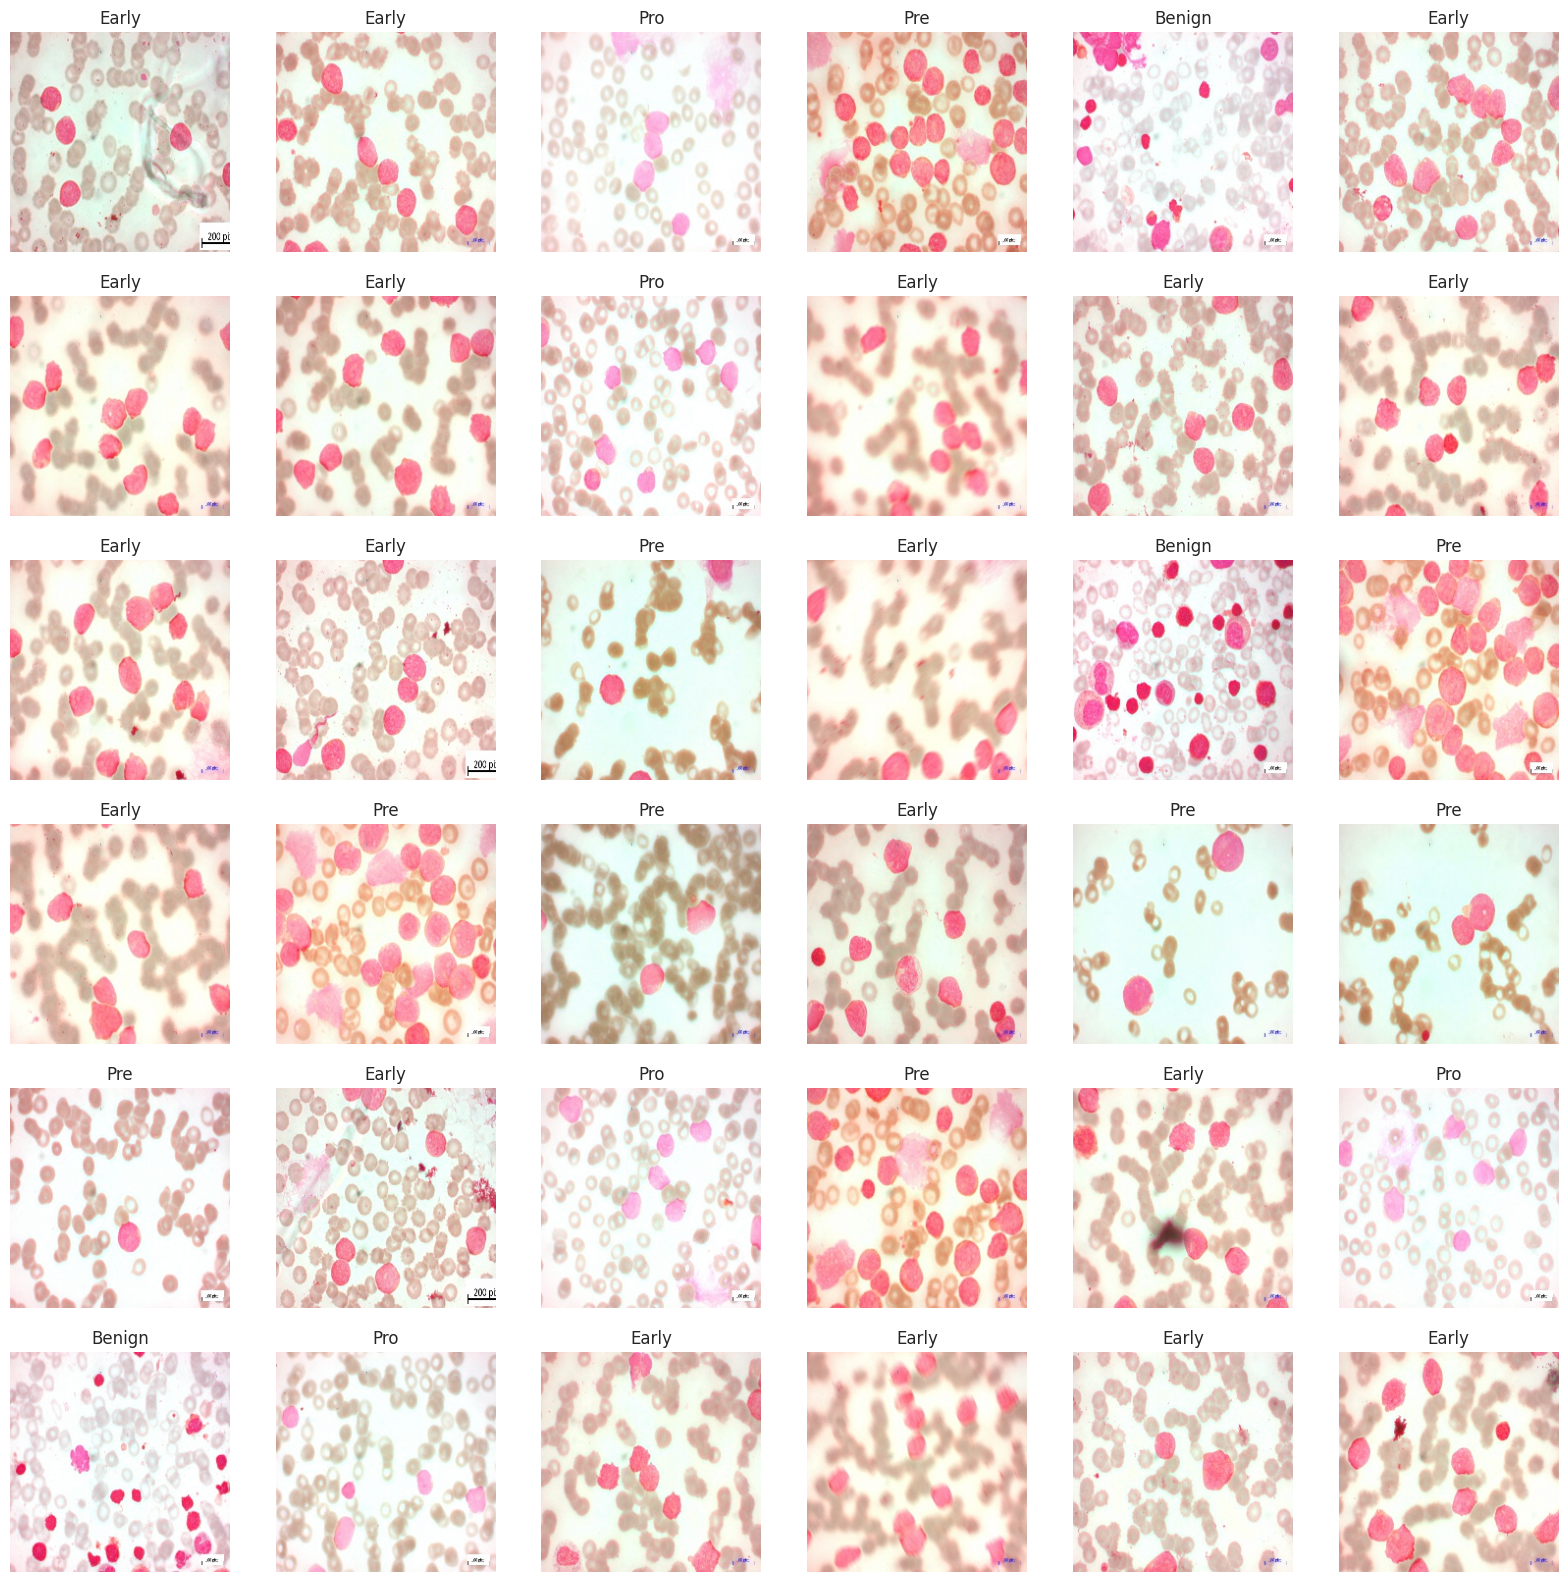

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [ ]:
# Define dataset path for 'Benign' class in the test set
benign_test_path = "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Segmented/Benign"

X_test = []
y_test = []

for img in tqdm(os.listdir(benign_test_path)):
    image = cv2.imread(os.path.join(benign_test_path, img), 1)
    image_array = cv2.resize(image, (s, s))
    X_test.append(image_array)  # No need to convert to list explicitly
    y_test.append(code['Benign'])  # Ensure 'Benign' exists in the code dictionary


100%|██████████| 504/504 [00:00<00:00, 1197.72it/s]


In [ ]:
# Define dataset path for 'Early' class in the test set
early_test_path = "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Segmented/Early"

for img in tqdm(os.listdir(early_test_path)):
    image = cv2.imread(os.path.join(early_test_path, img), 1)
    image_array = cv2.resize(image, (s, s))
    X_test.append(image_array)  # No need to convert to list explicitly
    y_test.append(code['Early'])  # Ensure 'Early' exists in the code dictionary


100%|██████████| 985/985 [00:00<00:00, 1362.93it/s]


In [ ]:
# Define dataset path for 'Pre' class in the test set
pre_test_path = "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Segmented/Pre"

for img in tqdm(os.listdir(pre_test_path)):
    image = cv2.imread(os.path.join(pre_test_path, img), 1)
    image_array = cv2.resize(image, (s, s))
    X_test.append(image_array)  # No need to convert to list explicitly
    y_test.append(code['Pre'])  # Ensure 'Pre' exists in the code dictionary


100%|██████████| 963/963 [00:00<00:00, 1451.95it/s]


In [ ]:
# Define dataset path for 'Pro' class in the test set
pro_test_path = "/root/.cache/kagglehub/datasets/mehradaria/leukemia/versions/1/Segmented/Pro"

for img in tqdm(os.listdir(pro_test_path)):
    image = cv2.imread(os.path.join(pro_test_path, img), 1)
    image_array = cv2.resize(image, (s, s))
    X_test.append(image_array)  # No need to convert to list explicitly
    y_test.append(code['Pro'])  # Ensure 'Pro' exists in the code dictionary


100%|██████████| 804/804 [00:00<00:00, 1497.35it/s]


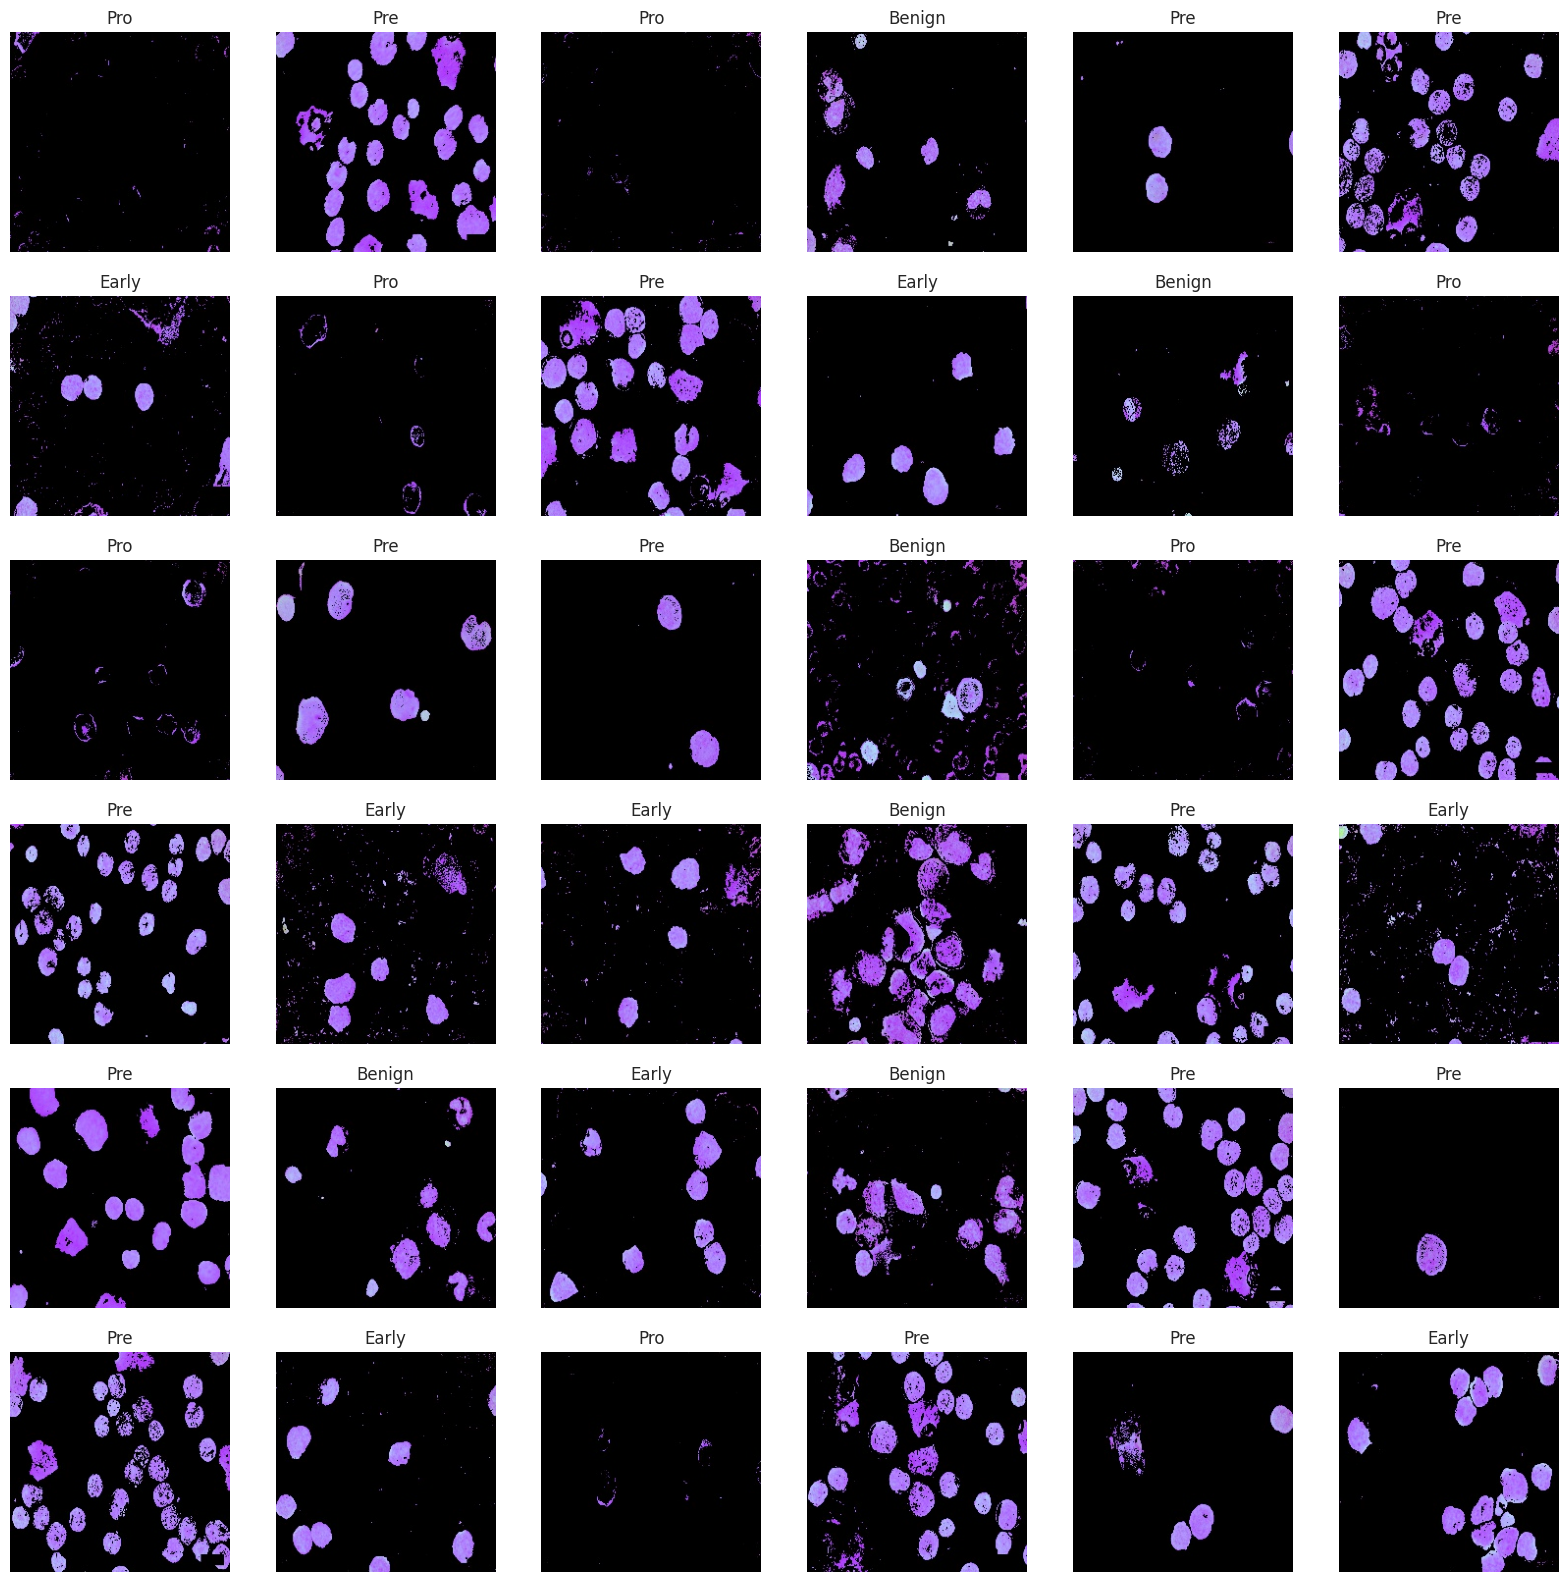

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [ ]:
da=[]
for i,j in zip(X_train,y_train):
    da.append([i,j])
import random
random.shuffle(da)
len(da)

4241

In [ ]:
X=[]
y=[]
for img,label in da:
    X.append(img)
    y.append(label)
X=np.array(X)
y=np.array(y)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,shuffle=True)
print(xtest.shape)
print(xtrain.shape)

(849, 224, 224, 3)
(3392, 224, 224, 3)


In [ ]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model

# Define the model architecture
input_shape = (224, 224, 3)  # Assuming images are 224x224 with 3 channels (RGB)

# Step 1: Segmentation using ResNet50 (Pretrained)
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
resnet_base.trainable = False  # Freeze ResNet layers

# Step 2: Global Average Pooling after ResNet50
inputs = Input(shape=input_shape)

# Segmentation using ResNet50
segmentation_features = resnet_base(inputs, training=False)

# Apply GlobalAveragePooling2D to reduce the spatial dimensions
pooled_features = GlobalAveragePooling2D()(segmentation_features)

# Step 3: Feature Extraction using EfficientNetB0
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet_base.trainable = False  # Freeze EfficientNet layers

# Pass the pooled features from ResNet50 to EfficientNetB0 (reusing the feature extraction part)
feature_extracted = efficientnet_base(inputs)

# Global Average Pooling for feature extraction
extracted_features = GlobalAveragePooling2D()(feature_extracted)

# Classification using CNN
x = Dense(128, activation='relu')(extracted_features)
x = Dense(64, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)  # Assuming 4 classes (Benign, Early, Pre, Pro)

# Define the final model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print summary
model.summary()

# Train the model
history = model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

# Model Loss and Accuracy

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,222,055 (16.11 MB)

 Trainable params: 172,484 (673.77 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - accuracy: 0.7927 - loss: 0.5750 - val_accuracy: 0.9600 - val_loss: 0.1072
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.9642 - loss: 0.0981 - val_accuracy: 0.9600 - val_loss: 0.0939
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.9768 - loss: 0.0642 - val_accuracy: 0.9835 - val_loss: 0.0434
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.9861 - loss: 0.0429 - val_accuracy: 0.9918 - val_loss: 0.0259
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 297s 3s/step - accuracy: 0.9867 - loss: 0.0378 - val_accuracy: 0.9929 - val_loss: 0.0213
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 345s 3s/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9894 - val_loss: 0.0282
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.9903 - loss: 0.0268 - val_accuracy: 0.9918 - val_loss: 0.0232
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.9948 - loss: 0.0166 - val_accu

Training Loss: 0.01402452401816845
Training Accuracy: 0.994988203048706
Validation Loss: 0.03597584739327431
Validation Accuracy: 0.9858657121658325
27/27 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step


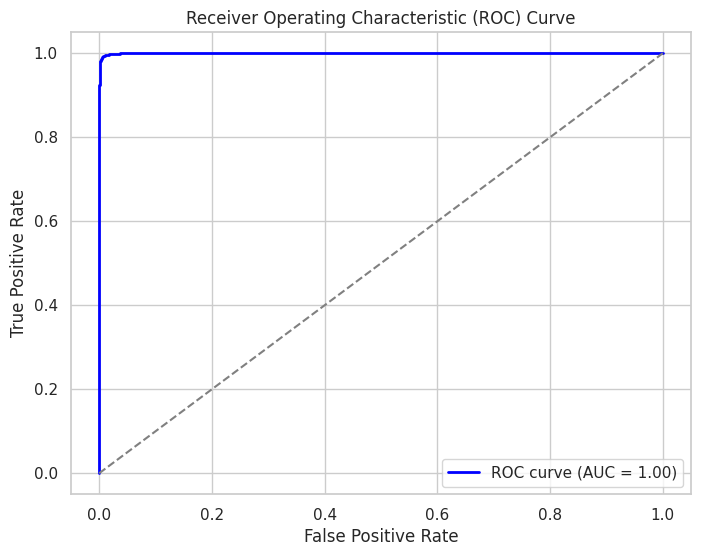

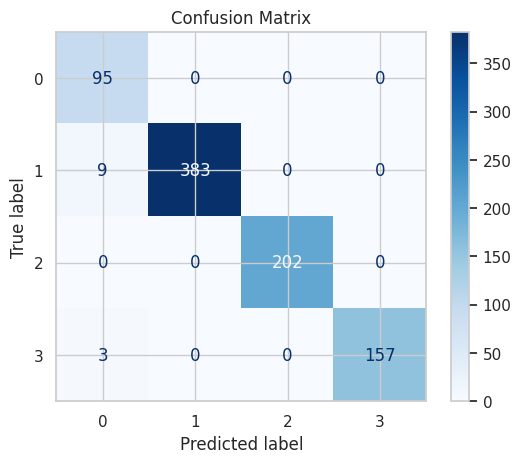

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        95
           1       1.00      0.98      0.99       392
           2       1.00      1.00      1.00       202
           3       1.00      0.98      0.99       160

    accuracy                           0.99       849
   macro avg       0.97      0.99      0.98       849
weighted avg       0.99      0.99      0.99       849



In [ ]:
# Model Loss and Accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print(f"Training Loss: {train_loss[-1]}")
print(f"Training Accuracy: {train_accuracy[-1]}")
print(f"Validation Loss: {val_loss[-1]}")
print(f"Validation Accuracy: {val_accuracy[-1]}")

# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

ytest_binarized = LabelBinarizer().fit_transform(ytest)
y_pred = model.predict(xtest)
fpr, tpr, _ = roc_curve(ytest_binarized.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(ytest, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(ytest, y_pred_classes))

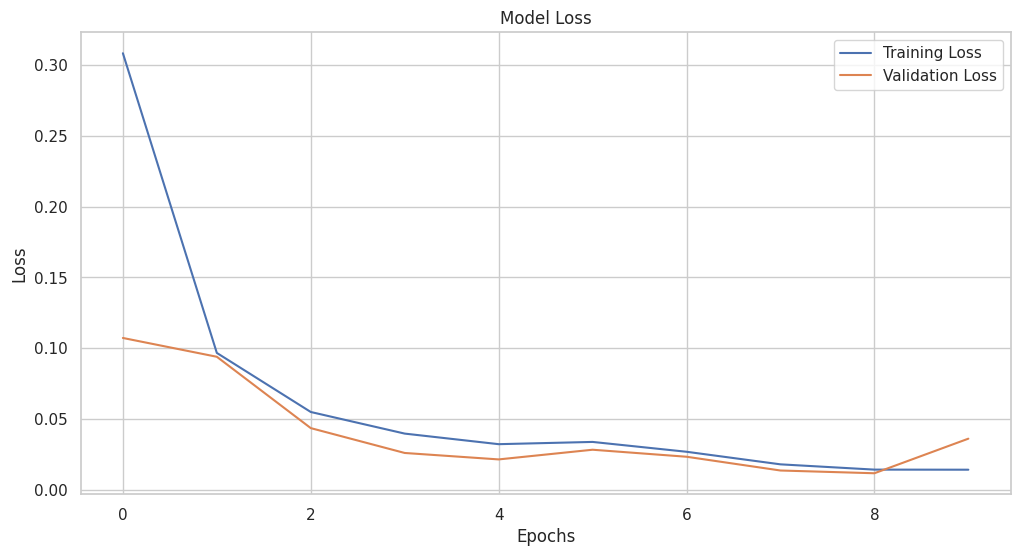

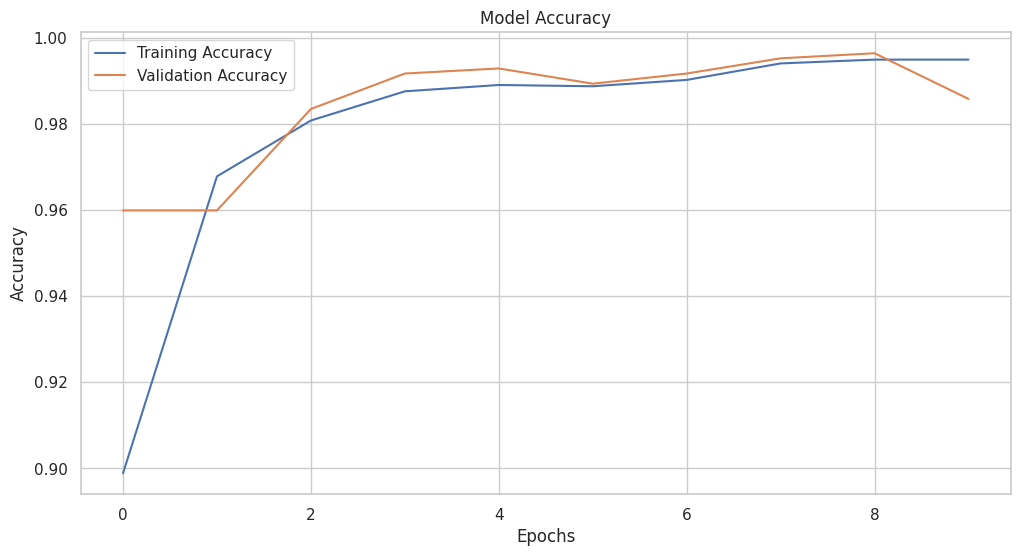

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


27/27 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step


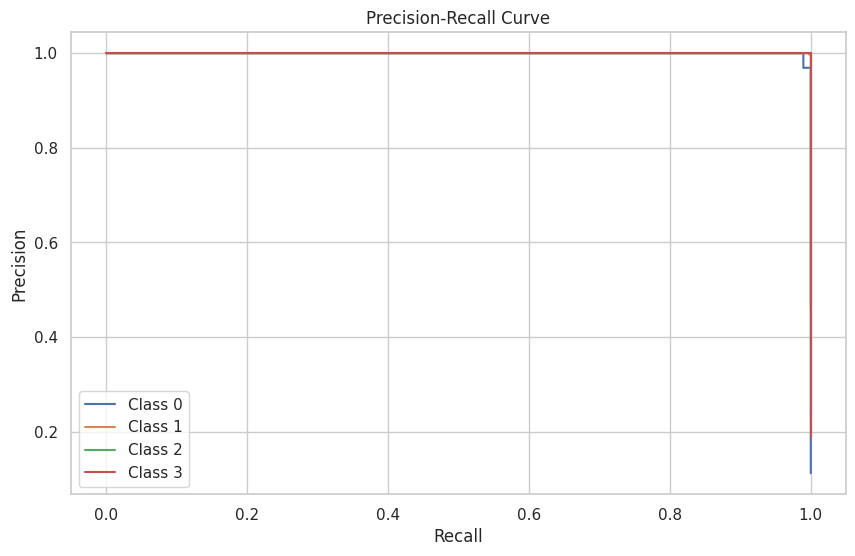

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Convert labels to one-hot encoding
y_test_bin = label_binarize(ytest, classes=[0, 1, 2, 3])  # Adjust based on your dataset

# Get Predictions
y_pred_prob = model.predict(xtest)  # Ensure xtest is correctly formatted

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()



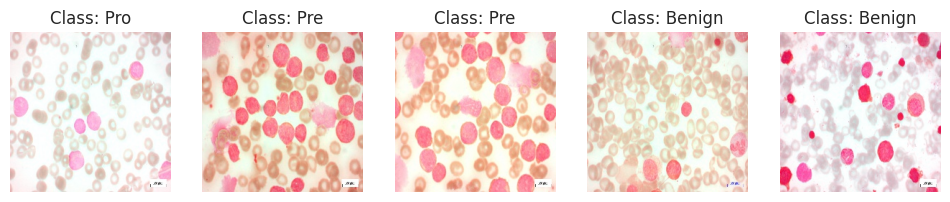

In [ ]:
import matplotlib.pyplot as plt
import random

# Display random images from dataset
def plot_sample_images(X, y, class_names, num_samples=5):
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        idx = random.randint(0, len(X) - 1)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X[idx])
        plt.title(f"Class: {class_names[y[idx]]}")
        plt.axis("off")
    plt.show()

# Define class labels
class_labels = {0: 'Benign', 1: 'Early', 2: 'Pre', 3: 'Pro'}

# Visualize some training images
plot_sample_images(xtrain, ytrain, class_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


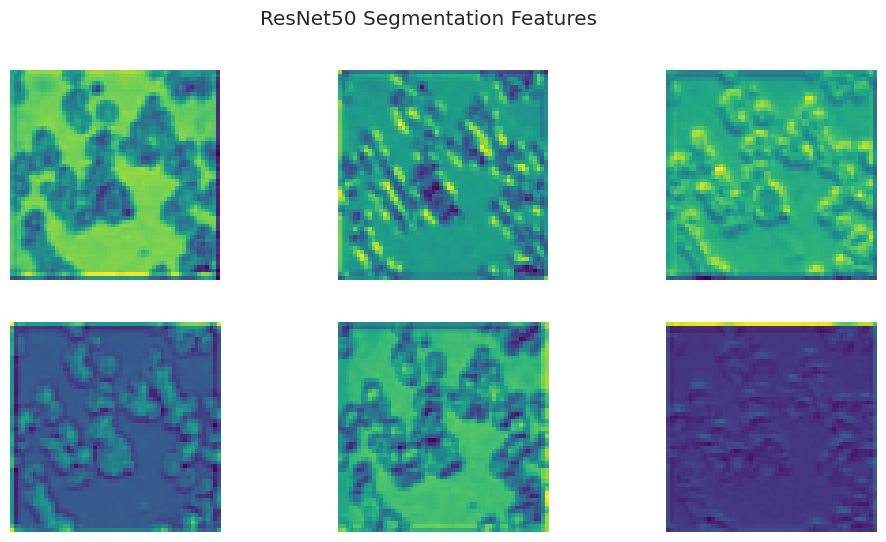

In [ ]:
from tensorflow.keras.models import Model
import numpy as np

# Get intermediate ResNet50 layer outputs
resnet_intermediate_layer = Model(inputs=resnet_base.input, outputs=resnet_base.layers[10].output)

# Select a random image
idx = random.randint(0, len(xtest) - 1)
img = np.expand_dims(xtest[idx], axis=0)

# Get feature map
feature_map = resnet_intermediate_layer.predict(img)

# Plot feature map
plt.figure(figsize=(12, 6))
for i in range(6):  # Display first 6 feature maps
    plt.subplot(2, 3, i+1)
    plt.imshow(feature_map[0, :, :, i], cmap='viridis')
    plt.axis("off")
plt.suptitle("ResNet50 Segmentation Features")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


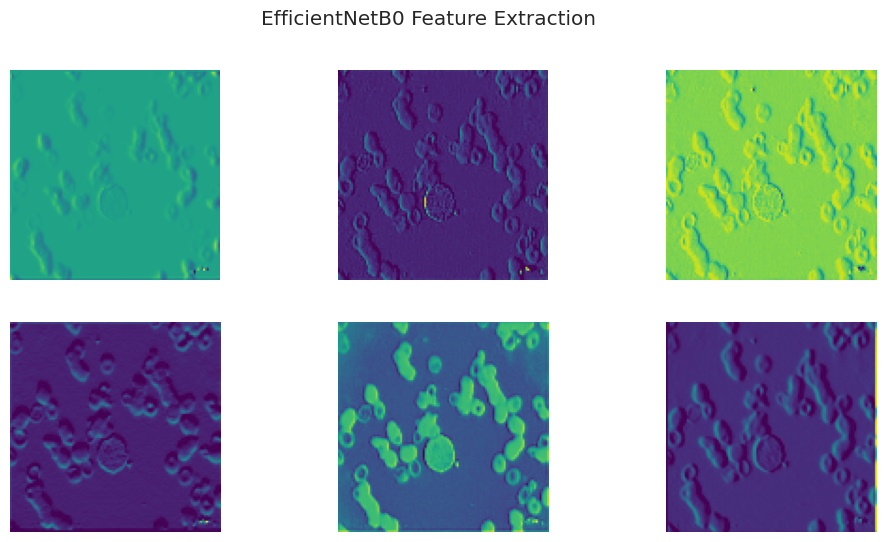

In [ ]:
efficientnet_intermediate_layer = Model(inputs=efficientnet_base.input, outputs=efficientnet_base.layers[10].output)

# Get EfficientNet feature map
efficient_feature_map = efficientnet_intermediate_layer.predict(img)

# Plot feature map
plt.figure(figsize=(12, 6))
for i in range(6):  # Display first 6 feature maps
    plt.subplot(2, 3, i+1)
    plt.imshow(efficient_feature_map[0, :, :, i], cmap='viridis')
    plt.axis("off")
plt.suptitle("EfficientNetB0 Feature Extraction")
plt.show()


27/27 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step


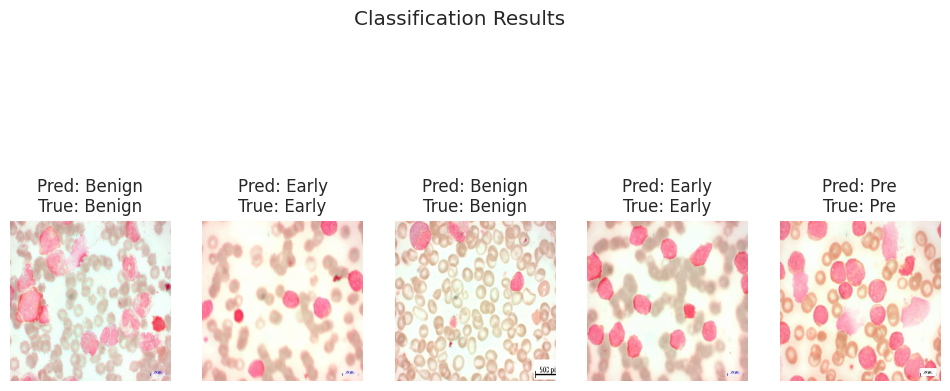

In [ ]:
# Get model predictions
predictions = model.predict(xtest)
predicted_labels = np.argmax(predictions, axis=1)

# Display original image and prediction
plt.figure(figsize=(12, 6))
for i in range(5):  # Display 5 sample predictions
    idx = random.randint(0, len(xtest) - 1)
    plt.subplot(1, 5, i+1)
    plt.imshow(xtest[idx])
    plt.title(f"Pred: {class_labels[predicted_labels[idx]]}\nTrue: {class_labels[ytest[idx]]}")
    plt.axis("off")
plt.suptitle("Classification Results")
plt.show()


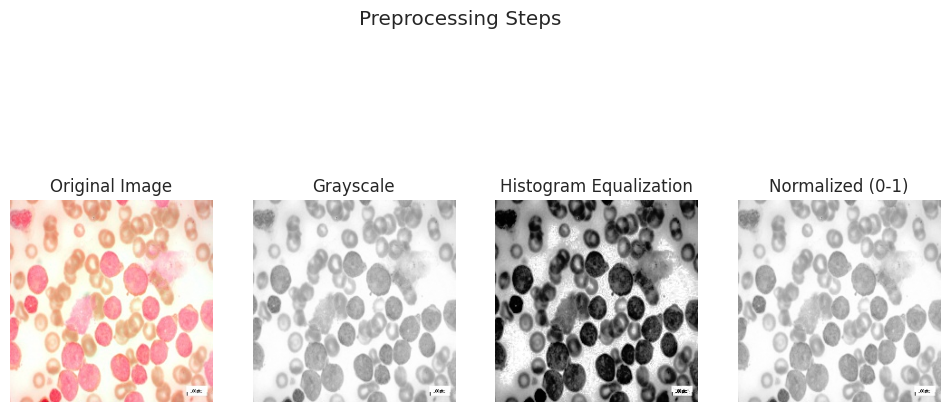

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Select a random image
idx = random.randint(0, len(xtest) - 1)
original_img = xtest[idx]

# Convert to grayscale
gray_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)

# Apply Histogram Equalization
equalized_img = cv2.equalizeHist(gray_img)

# Normalize (scaling pixel values to range 0-1)
normalized_img = gray_img / 255.0

# Plot the preprocessing steps
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")

# Grayscale image
plt.subplot(1, 4, 2)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

# Histogram Equalization
plt.subplot(1, 4, 3)
plt.imshow(equalized_img, cmap='gray')
plt.title("Histogram Equalization")
plt.axis("off")

# Normalized image
plt.subplot(1, 4, 4)
plt.imshow(normalized_img, cmap='gray')
plt.title("Normalized (0-1)")
plt.axis("off")

plt.suptitle("Preprocessing Steps")
plt.show()


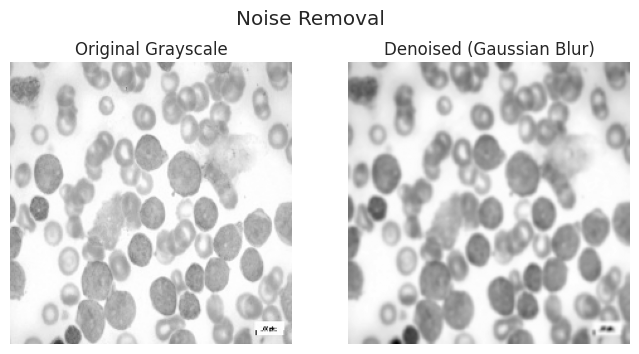

In [ ]:
# Apply Gaussian Blur for noise reduction
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

plt.figure(figsize=(8, 4))

# Original grayscale
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title("Denoised (Gaussian Blur)")
plt.axis("off")

plt.suptitle("Noise Removal")
plt.show()


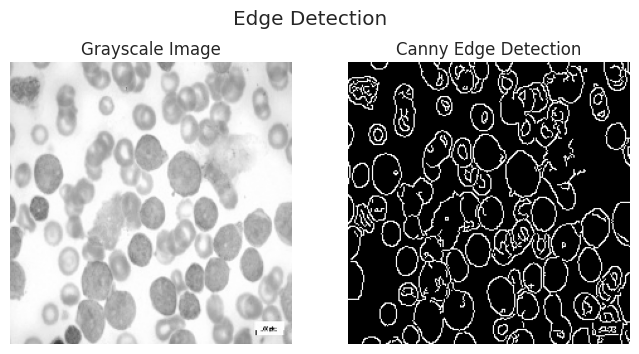

In [ ]:
# Apply Canny Edge Detection
edges = cv2.Canny(gray_img, 50, 150)

plt.figure(figsize=(8, 4))

# Original grayscale
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

plt.suptitle("Edge Detection")
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

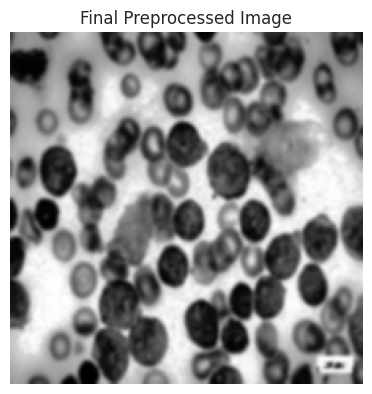

In [ ]:
# Apply all preprocessing steps together
processed_img = cv2.GaussianBlur(equalized_img, (5, 5), 0)
edges_final = cv2.Canny(processed_img, 50, 150)

plt.figure(figsize=(10, 5))

# Preprocessed image
plt.subplot(1, 2, 1)
plt.imshow(processed_img, cmap='gray')
plt.title("Final Preprocessed Image")
plt.axis("off")

# Edge detection on processed image
plt
